This step is to conduct Principle Component Analysis(PCA). 

# Import modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Define functions

In [2]:
def plot_pca(df,list):
    '''plot principal component(s)
    return linear combination values.'''
    print('PCA results for: ' + str(list))
    df_list=df[list].dropna() #need to update on 02_Missing ipynb
    df_list_centered = preprocessing.scale(df_list.T) # Normalization
    
        #PCA - source: https://www.youtube.com/watch?v=Lsue2gEM9D0&pbjreload=101
    pca= PCA()
    pca.fit(df_list_centered)
    pca_data = pca.transform(df_list_centered)
    per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
    
        #plot component scores
    labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
    plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principle Component')
    plt.title('Scree Plot')
    plt.show()
    
        # calculate the PC1's linear combination of var list
    pca_df=pd.DataFrame(pca_data, index = df_list.columns.to_list(), columns=labels)
    linear_com=pca_df['PC1'].reset_index()
    linear_com.columns=['columns', 'PC1']
    print(linear_com)
    newcol = np.zeros(shape = (1, df.shape[0]))
    for x in range(0,len(per_var)):
        newcol += df[linear_com.iloc[x,0]]*linear_com.iloc[x,1]
    print('---------------------------------------------')
    return newcol


# Import data

In [3]:
train_df_imputed=pd.read_csv('train_df_imputed.csv',index_col=0)

In [4]:
train_df_imputed.head()

,hospital_death,elective_surgery,apache_post_operative,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_mbp_min,...,h1_diasbp_noninvasive_min,h1_mbp_min,h1_mbp_noninvasive_min,h1_sysbp_min,h1_sysbp_noninvasive_min,d1_calcium_min,d1_calcium_max,albumin_apache,d1_albumin_max,d1_albumin_min
0,0,0,0,68.0,3.000000,6.000000,4.000000,37.0,37.0,46.0,...,63.000000,85.0,85.000000,115.0,115.000000,7.400000,8.500000,2.300000,2.300000,2.300000
1,0,0,0,77.0,1.000000,3.000000,1.000000,31.0,31.0,38.0,...,48.000000,57.0,57.000000,71.0,71.000000,8.000000,8.600000,2.902968,1.600000,1.600000
2,0,0,0,25.0,3.000000,6.000000,5.000000,48.0,48.0,68.0,...,58.000000,83.0,83.000000,124.0,124.000000,8.179575,8.378881,2.902968,2.968332,2.900007
3,0,1,1,81.0,4.000000,6.000000,5.000000,42.0,42.0,84.0,...,63.270616,71.0,79.709315,106.0,116.549625,8.179575,8.378881,2.902968,2.968332,2.900007
4,0,0,0,19.0,3.465049,5.471195,3.994778,57.0,57.0,90.0,...,68.000000,92.0,92.000000,120.0,120.000000,8.179575,8.378881,2.902968,2.968332,2.900007


In [5]:
train_df_imputed.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 91712
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hospital_death             91713 non-null  int64  
 1   elective_surgery           91713 non-null  int64  
 2   apache_post_operative      91713 non-null  int64  
 3   age                        91713 non-null  float64
 4   gcs_eyes_apache            91713 non-null  float64
 5   gcs_motor_apache           91713 non-null  float64
 6   gcs_verbal_apache          91713 non-null  float64
 7   d1_diasbp_min              91713 non-null  float64
 8   d1_diasbp_noninvasive_min  91713 non-null  float64
 9   d1_mbp_min                 91713 non-null  float64
 10  d1_mbp_noninvasive_min     91713 non-null  float64
 11  d1_sysbp_min               91713 non-null  float64
 12  d1_sysbp_noninvasive_min   91713 non-null  float64
 13  h1_diasbp_noninvasive_min  91713 non-null  flo

# Correlation and heatmap

In [6]:
#correlation matrix
train_df_imputed.corr()

,hospital_death,elective_surgery,apache_post_operative,age,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_mbp_min,...,h1_diasbp_noninvasive_min,h1_mbp_min,h1_mbp_noninvasive_min,h1_sysbp_min,h1_sysbp_noninvasive_min,d1_calcium_min,d1_calcium_max,albumin_apache,d1_albumin_max,d1_albumin_min
hospital_death,1.000000,-0.093574,-0.083674,0.106603,-0.255160,-0.276794,-0.236218,-0.179225,-0.178564,-0.194916,...,-0.127870,-0.138433,-0.142645,-0.143789,-0.144509,-0.121270,-0.071184,-0.138517,-0.131962,-0.152602
elective_surgery,-0.093574,1.000000,0.908247,0.066359,0.009754,0.015660,-0.013262,0.007186,0.017169,0.012444,...,-0.049142,-0.069848,-0.036849,-0.035765,-0.019489,-0.085953,-0.068588,-0.014100,-0.009729,-0.018537
apache_post_operative,-0.083674,0.908247,1.000000,0.058331,-0.010471,-0.000022,-0.037481,0.000262,0.010289,0.003918,...,-0.052449,-0.074283,-0.041568,-0.039364,-0.023414,-0.115972,-0.090541,-0.032046,-0.026230,-0.036925
age,0.106603,0.066359,0.058331,1.000000,0.025742,0.025275,-0.017420,-0.206490,-0.203517,-0.128354,...,-0.182210,-0.103478,-0.096696,-0.004929,-0.003019,0.042781,0.020964,-0.074244,-0.081839,-0.075736
gcs_eyes_apache,-0.255160,0.009754,-0.010471,0.025742,1.000000,0.800127,0.779128,0.113739,0.111064,0.138282,...,0.076786,0.108649,0.101128,0.126279,0.117072,0.153049,0.082797,0.071916,0.052371,0.077400
gcs_motor_apache,-0.276794,0.015660,-0.000022,0.025275,0.800127,1.000000,0.699706,0.101760,0.099140,0.125399,...,0.064614,0.093631,0.085469,0.115045,0.105300,0.141300,0.067071,0.066383,0.046026,0.070764
gcs_verbal_apache,-0.236218,-0.013262,-0.037481,-0.017420,0.779128,0.699706,1.000000,0.123403,0.120313,0.150203,...,0.085306,0.119735,0.110569,0.133324,0.123041,0.152098,0.082093,0.086182,0.069987,0.093587
d1_diasbp_min,-0.179225,0.007186,0.000262,-0.206490,0.113739,0.101760,0.123403,1.000000,0.992998,0.852638,...,0.605501,0.562736,0.565075,0.419870,0.420745,0.189508,0.151390,0.175956,0.179217,0.192023
d1_diasbp_noninvasive_min,-0.178564,0.017169,0.010289,-0.203517,0.111064,0.099140,0.120313,0.992998,1.000000,0.848739,...,0.607707,0.559427,0.567147,0.418354,0.422307,0.188340,0.152143,0.175696,0.179437,0.192117
d1_mbp_min,-0.194916,0.012444,0.003918,-0.128354,0.138282,0.125399,0.150203,0.852638,0.848739,1.000000,...,0.549291,0.619455,0.621576,0.514294,0.514282,0.224680,0.181005,0.196107,0.201109,0.213006


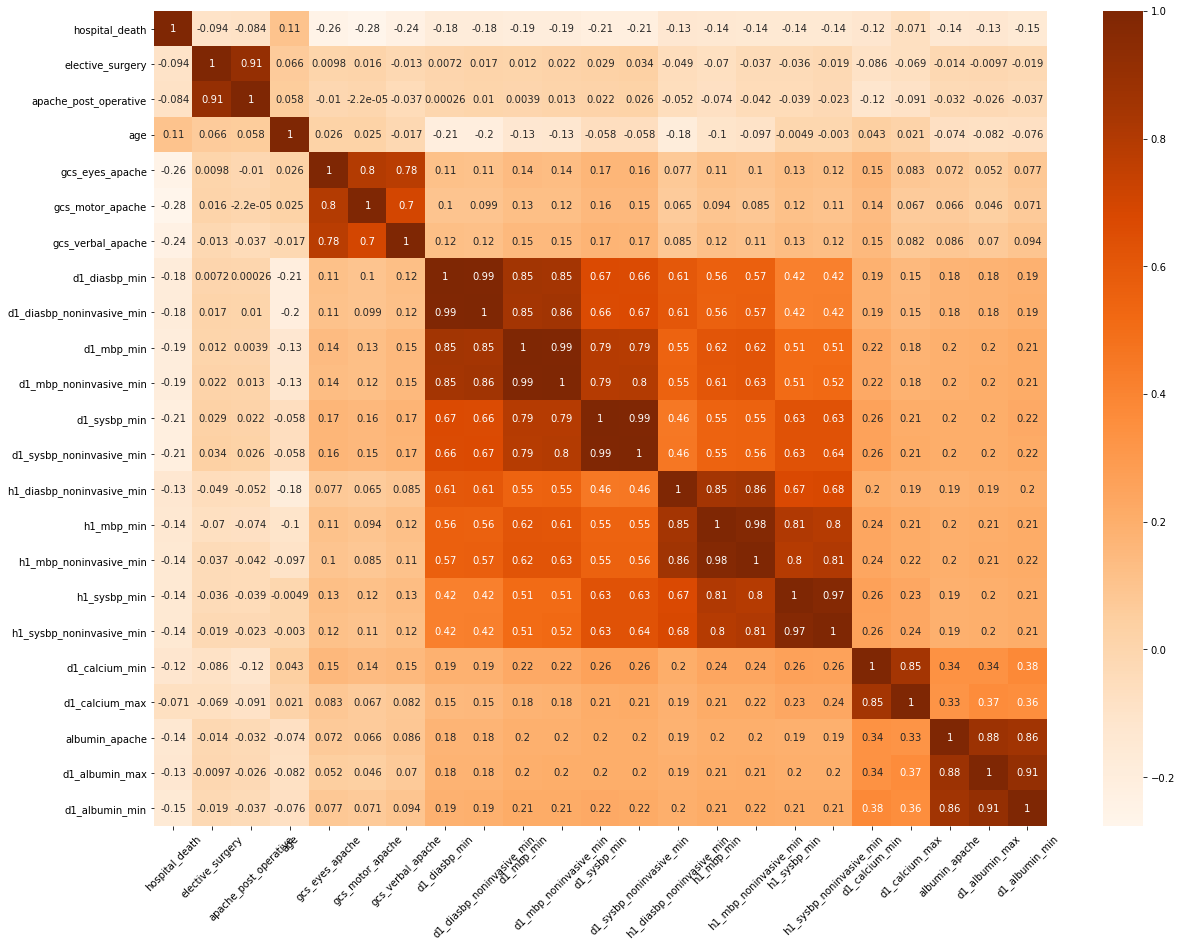

In [7]:
#heatmap - to visualize correlations between selected features and response. 
plt.figure(figsize = (20,15))
sns.heatmap(train_df_imputed.corr(),cmap='Oranges',annot=True)
plt.xticks(rotation=45)
plt.show()


There are strong multicolinear relations between vars. --> solution: PCA

# PCA

In [8]:
# pca lists
fac_surgery=['elective_surgery','apache_post_operative']
fac_apache = ['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache']
fac_d1_h1 = ['d1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min',
       'h1_diasbp_noninvasive_min', 'h1_mbp_min', 'h1_mbp_noninvasive_min',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_min']
fac_calcium = ['d1_calcium_min','d1_calcium_max']
fac_albumin = ['albumin_apache', 'd1_albumin_max', 'd1_albumin_min']



PCA results for: ['elective_surgery', 'apache_post_operative']


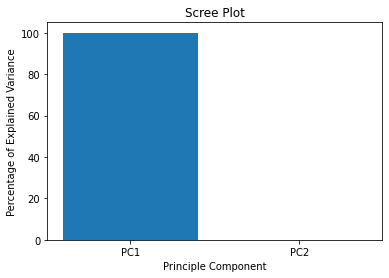

                 columns        PC1
0       elective_surgery  51.546096
1  apache_post_operative -51.546096
---------------------------------------------
PCA results for: ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']


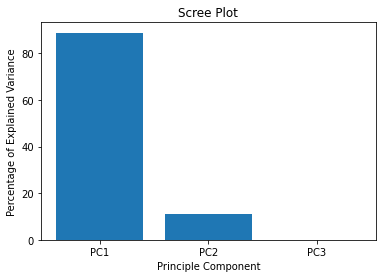

             columns         PC1
0    gcs_eyes_apache -308.421237
1   gcs_motor_apache  363.758917
2  gcs_verbal_apache  -55.337680
---------------------------------------------
PCA results for: ['d1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_min', 'h1_mbp_min', 'h1_mbp_noninvasive_min', 'h1_sysbp_min', 'h1_sysbp_noninvasive_min']


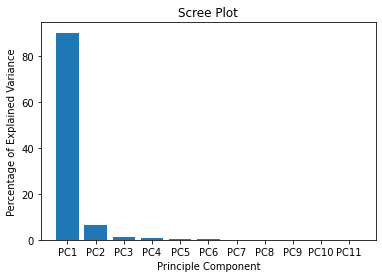

                      columns         PC1
0               d1_diasbp_min -375.545651
1   d1_diasbp_noninvasive_min -374.601400
2                  d1_mbp_min -183.212302
3      d1_mbp_noninvasive_min -182.432991
4                d1_sysbp_min  230.554282
5    d1_sysbp_noninvasive_min  231.415304
6   h1_diasbp_noninvasive_min -220.802808
7                  h1_mbp_min  -15.444413
8      h1_mbp_noninvasive_min  -11.247339
9                h1_sysbp_min  449.033749
10   h1_sysbp_noninvasive_min  452.283568
---------------------------------------------
PCA results for: ['d1_calcium_min', 'd1_calcium_max']


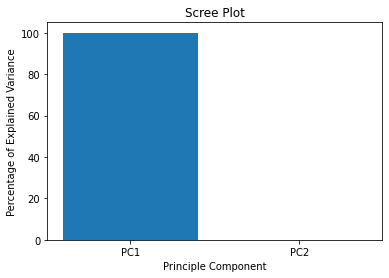

          columns         PC1
0  d1_calcium_min -203.558345
1  d1_calcium_max  203.558345
---------------------------------------------
PCA results for: ['albumin_apache', 'd1_albumin_max', 'd1_albumin_min']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


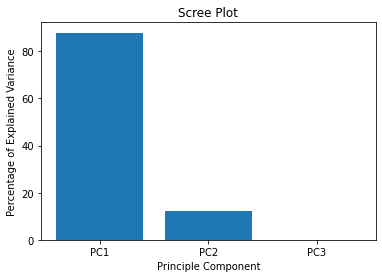

          columns         PC1
0  albumin_apache -170.173147
1  d1_albumin_max  335.248523
2  d1_albumin_min -165.075376
---------------------------------------------


In [9]:
# plot principal component(s) of each list:
surgery=plot_pca(train_df_imputed,fac_surgery)
apache=plot_pca(train_df_imputed,fac_apache)
d1_h1=plot_pca(train_df_imputed,fac_d1_h1)
calcium=plot_pca(train_df_imputed,fac_calcium)
albumin=plot_pca(train_df_imputed,fac_albumin)


In [10]:
#concate new columns into a dataframe
comb_df = pd.DataFrame(surgery.tolist()+apache.tolist()+d1_h1.tolist()+calcium.tolist()+albumin.tolist()).transpose()
comb_df_center = preprocessing.scale(comb_df.T) # Normalization

comb_df_centered = pd.DataFrame(comb_df_center).transpose()
comb_df_centered.columns=['fac_surgery','fac_apache','fac_d1_h1','fac_calcium','fac_albumin']

reg_df=pd.concat([train_df_imputed[['hospital_death','age']], comb_df_centered], axis=1)
#,train_df_imputed.loc[:,train_df_imputed.dtypes == 'object'] #not include categorical vars here.


In [11]:
reg_df.to_csv('reg_df.csv')